In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn

In [13]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [85]:
train=pd.read_csv('train.csv')

In [27]:
test=pd.read_csv('test.csv')

In [8]:
tree=DecisionTreeClassifier()

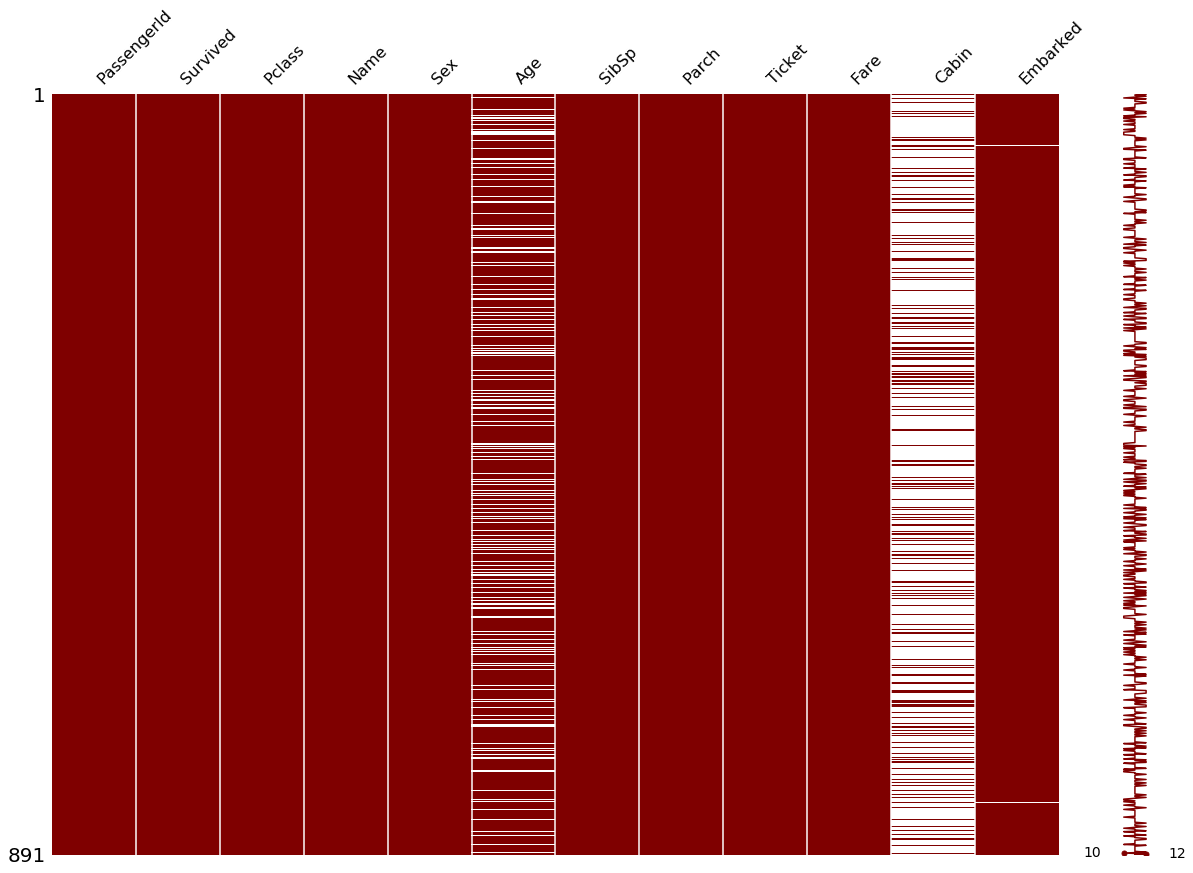

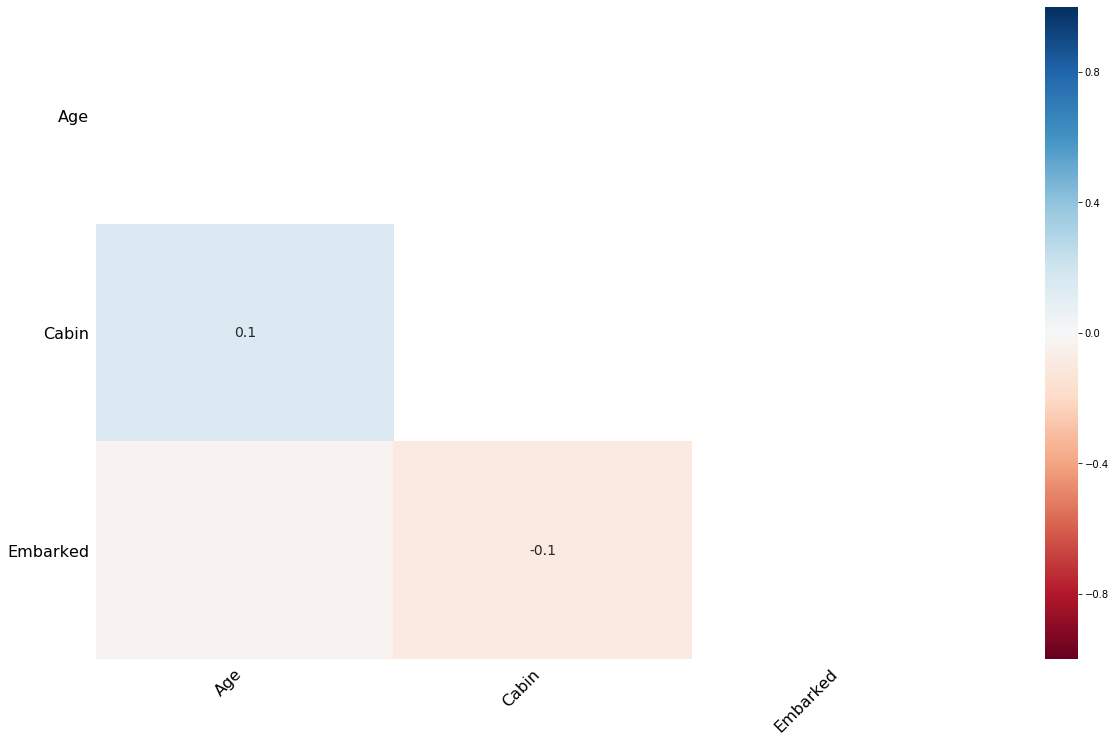

In [12]:
import missingno
missingno.matrix(train,figsize=(20,14),color=(0.5,0,0))
missingno.heatmap(train) 

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
train_num=train[['Pclass','SibSp','Parch','Fare']]

In [28]:
test_num=test[['Pclass','SibSp','Parch','Fare']]

In [22]:
target=train['Survived']

In [24]:
tree=DecisionTreeClassifier()

In [25]:
tree.fit(train_num,target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [34]:
tree.score(train_num,target)

0.8361391694725028

In [37]:
tree.predict(test_num)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [95]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(train['Sex'])

train['Sex_num']=le.transform(train['Sex'])

In [87]:
embark_mode=train['Embarked'].mode()

In [94]:
embark_mode.values

array(['S'], dtype=object)

In [91]:
train['Embarked']=train["Embarked"].fillna('S')

In [93]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

In [96]:
le=LabelEncoder()
le.fit(train['Embarked'])
train['Embarked_num']=le.transform(train['Embarked'])

In [99]:
train['Cabin'].isnull().sum()

687

In [100]:
len(train)

891

In [101]:
train['Pclass','Age']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,Embarked_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,2
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,0


In [107]:
age_mode=train['Age'].mode()

In [117]:
age_mode.values[0]

24.0

In [118]:
train['Age']=train['Age'].fillna(24)

In [119]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      24.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     24.0
18     31.0
19     24.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     24.0
27     19.0
28     24.0
29     24.0
       ... 
861    21.0
862    48.0
863    24.0
864    24.0
865    42.0
866    27.0
867    31.0
868    24.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878    24.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [122]:
train['Ticket'][0].split(' ')

['A/5', '21171']

In [125]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_num',
       'Embarked_num'],
      dtype='object')

In [129]:
train_select=train.select_dtypes(exclude='object')
train_select.drop(['PassengerId','Survived'],axis=1,inplace=True)

C:\Users\nsats\Anaconda3\envs\gpu-env\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [131]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier(n_estimators=10,n_jobs=-1)
random.fit(train_select,target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [134]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(train_select,target,test_size=0.2,random_state=0)

In [140]:
random=RandomForestClassifier(n_estimators=10,n_jobs=-1)
random.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [142]:
print(random.score(X_train,y_train))

0.9662921348314607


In [143]:
print(random.score(X_val,y_val))

0.8435754189944135


In [148]:
from sklearn.model_selection import cross_val_score
random=RandomForestClassifier(n_estimators=10)

scores=cross_val_score(estimator=random,X=train_select,y=target,scoring='accuracy',cv=5)

In [150]:
import numpy as np
print(np.mean(scores))

0.801454223315449


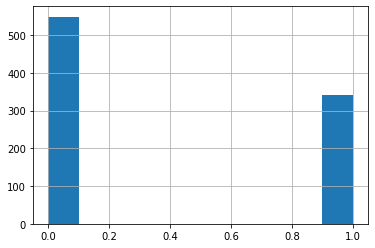

In [152]:
train['Survived'].hist()

In [153]:
type(scores)

numpy.ndarray

In [156]:
np.mean(scores)

0.801454223315449

In [157]:
np.std(scores)

0.03390059780533082

In [162]:
import lightgbm as lgm

In [165]:
lgm_model=lgm.LGBMClassifier()

scores=cross_val_score(estimator=lgm_model,X=train_select,y=target,scoring='accuracy',cv=5)

In [166]:
scores

array([0.79329609, 0.82681564, 0.85955056, 0.79775281, 0.8700565 ])

In [182]:
X=train['Cabin'].fillna('-99')
X=le.fit_transform(X)

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston=load_boston()

In [197]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [196]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
data=pd.DataFrame(boston.data, columns=boston.feature_names)

In [237]:
target=boston.target

In [213]:
import matplotlib.pyplot as plt
%matplotlib inline

In [216]:
target=boston.target

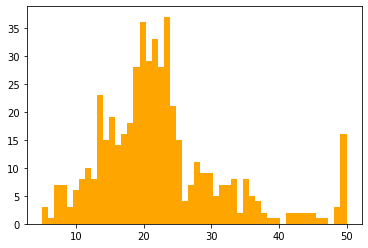

In [221]:
plt.hist(target,bins=50,color='orange')
plt.show()

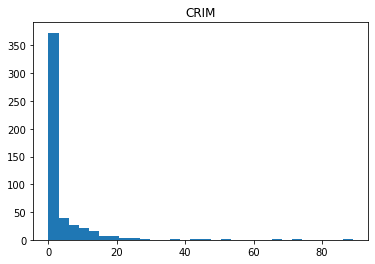

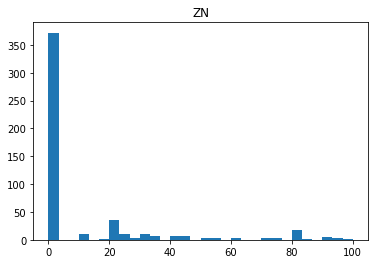

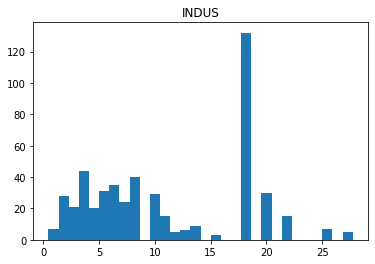

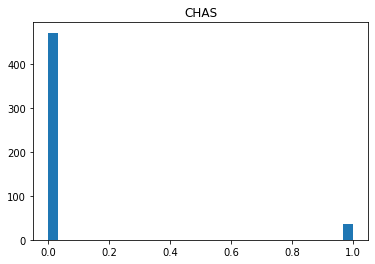

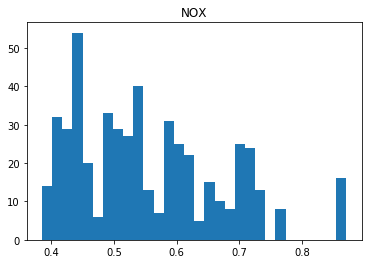

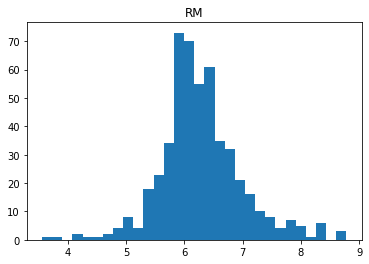

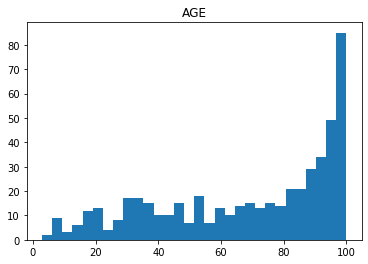

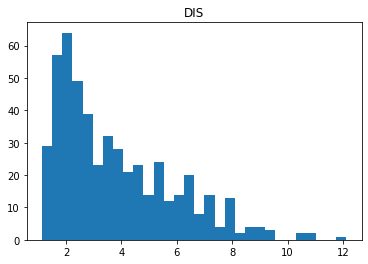

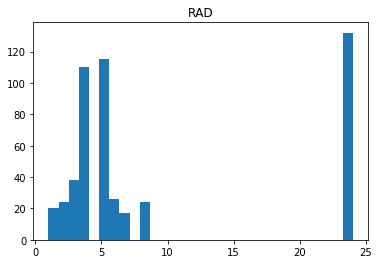

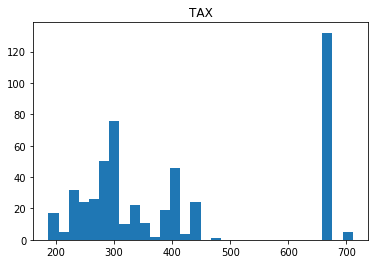

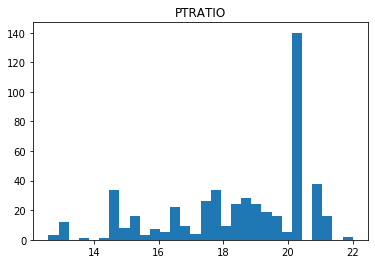

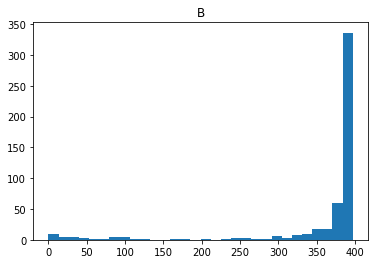

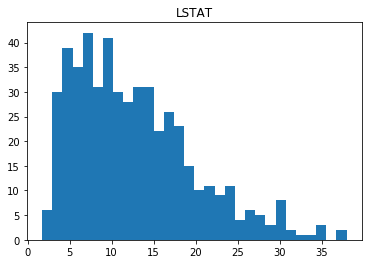

In [229]:
for i in data.columns:
    plt.hist(data[i],bins=30)
    plt.title(i)
    plt.show()

In [243]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(data,target,test_size=0.2,random_state=0)
lr=LinearRegression()

lr.fit(X_train,y_train)

y_pred=lr.predict(X_val)

In [245]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val,y_pred)

33.44897999767653

In [253]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(X_train,y_train)
y_pred_forest=forest.predict(X_val)

C:\Users\nsats\Anaconda3\envs\gpu-env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val,y_pred_forest)

In [263]:
from sklearn.model_selection import GridSearchCV
forest=RandomForestRegressor(n_estimators=105)

param_dit={'max_depth':[i for i in range(2,20)]}

gs=GridSearchCV(estimator=forest,param_grid=param_dit,scoring='r2',cv=5,n_jobs=-1)
gs.fit(data,target)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=105, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9

{'max_depth': 9}

In [265]:
best_model=gs.best_estimator_

In [261]:
best_model.fit(X_train,y_train)
y_pred=best_model.predict(X_val)

In [262]:
mean_squared_error(y_val,y_pred)

18.433736196700902

In [267]:
best_forest=RandomForestRegressor(n_estimators=105,max_depth=9)
best_forest.fit(X_train,y_train)
y_pred=best_forest.predict(X_val)

In [268]:
mean_squared_error(y_val,y_pred)

20.093090316695037

[0.04016005 0.00167674 0.00884481 0.00066775 0.02254641 0.41779414
 0.01308246 0.03799691 0.00381959 0.01339949 0.01882319 0.00824196
 0.41294651]


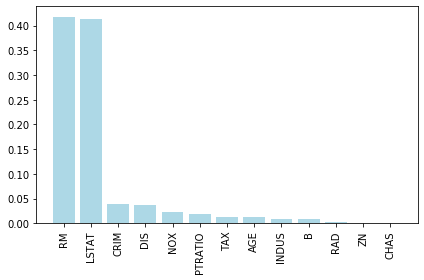

In [269]:
# RandomForestで重要な特徴量を識別
importaces=best_forest.feature_importances_
print(importaces)
#重要な特徴量順にインデックス番号を取得
indices=np.argsort(importaces)[::-1]
feat_labels=data.columns

plt.bar(range(X_train.shape[1]),importaces[indices],color='lightblue',align='center')
plt.xticks(range(X_train.shape[1]),feat_labels[indices],rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()

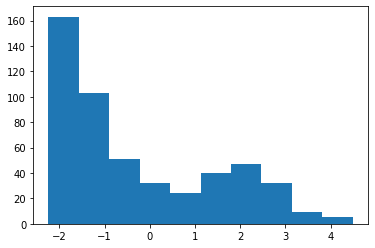

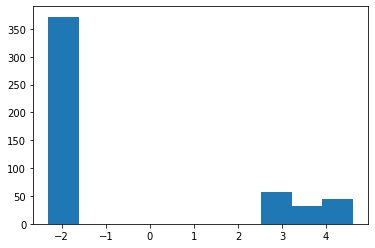

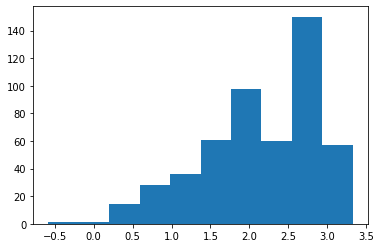

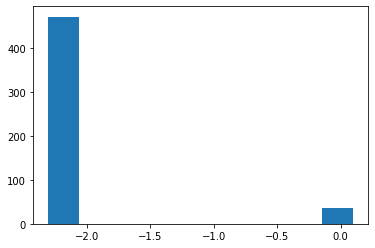

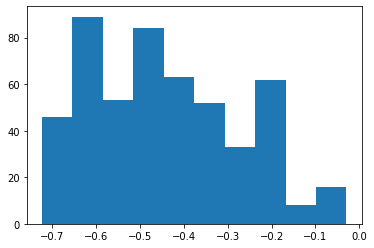

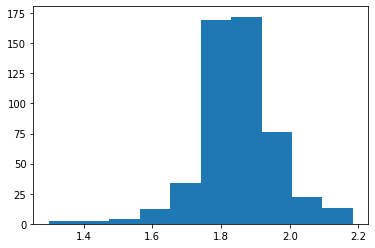

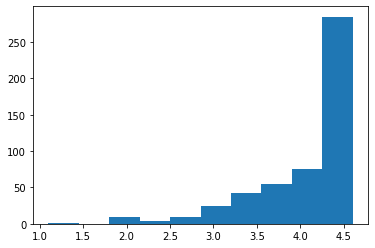

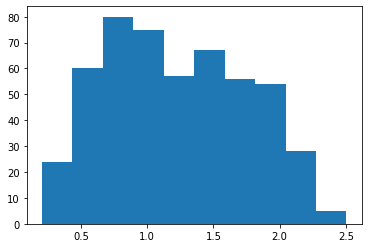

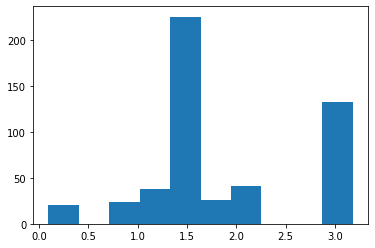

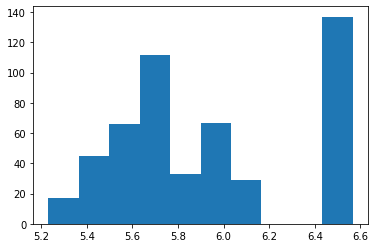

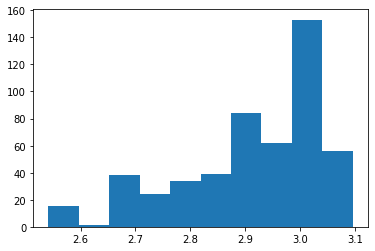

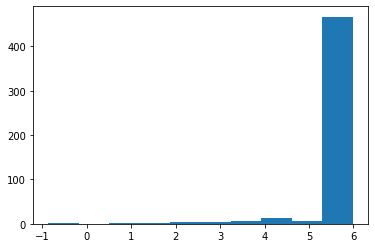

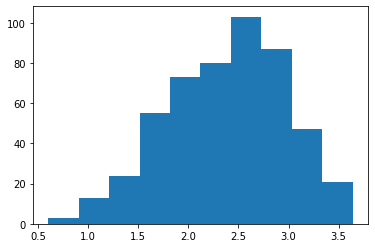

In [277]:
data=np.log(data+1e-1)
for i in tmp.columns:
    plt.hist(tmp[i])
    plt.show()

In [280]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(data,target,test_size=0.2,random_state=0)

forest=RandomForestRegressor()
forest.fit(X_train,y_train)

y_pred=forest.predict(X_val)

C:\Users\nsats\Anaconda3\envs\gpu-env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [281]:
mean_squared_error(y_val,y_pred)

21.281833333333335

In [282]:
from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV
forest=RandomForestRegressor()

param_dit={'max_depth':[i for i in range(2,20)],'n_estimators':[100,150,200,300]}

gs=GridSearchCV(estimator=forest,param_grid=param_dit,scoring='r2',cv=5,n_jobs=-1)
gs.fit(data,target)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8

In [285]:
forest_log=gs.best_estimator_
forest_log.fit(X_train,y_train)
y_pred_log=forest_log.predict(X_val)

In [286]:
mean_squared_error(y_val,y_pred_log)

19.745127649444896

In [287]:
import lightgbm as lgm

In [288]:
lgm_regressor=lgm.LGBMRegressor()
lgm_regressor.fit(X_train,y_train)
y_pred_lgm=lgm_regressor.predict(X_val)

In [289]:
mean_squared_error(y_val,y_pred_lgm)

24.498696726728348

# hello